### Discreatization
0. We create contigous intervals that span range of data set
1. Creating Bins for data
2. Handle Outliers
3. Improve value spread


### Binning

#### A. Unsupervised Binning

#### Equal width Binning
1. Outliers Handled, Value Spread Not Uniform
2. width each bin  = (max - min)/(Total bins)

#### Equal Frequency Binning// More Used
0. Outliers Handled + Value Spread Uniform
1. Ex: Intervals = 10 ==> Each interval contain 10% of total
2. So For interval = x ==> 0 - xth percentile,xth - 2xth percentile.....

#### K-Means Binning // Used FOr Clustered Data
1. Revise From YT Video


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import KBinsDiscretizer
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.dropna(inplace=True)
df.head(1)

,Survived,Age,Fare
0,0,22.0,7.25


In [79]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


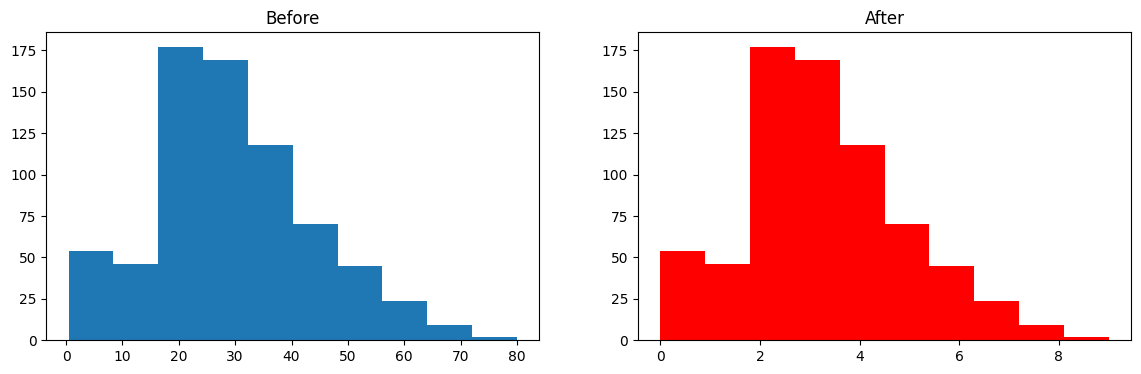

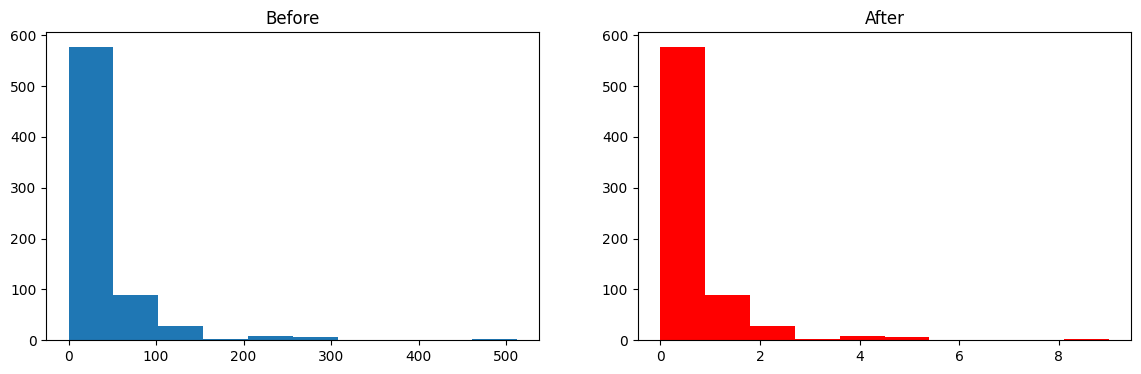

In [80]:
def KDiscreate(bins,statergy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=statergy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=statergy)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    x_trf = trf.fit_transform(df.iloc[:,1:])

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(df["Age"])
    plt.title("Before")
    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title("After")
    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(df["Fare"])
    plt.title("Before")
    plt.subplot(122)
    plt.hist(x_trf[:,1],color='red')
    plt.title("After")

KDiscreate(10,'uniform')


c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


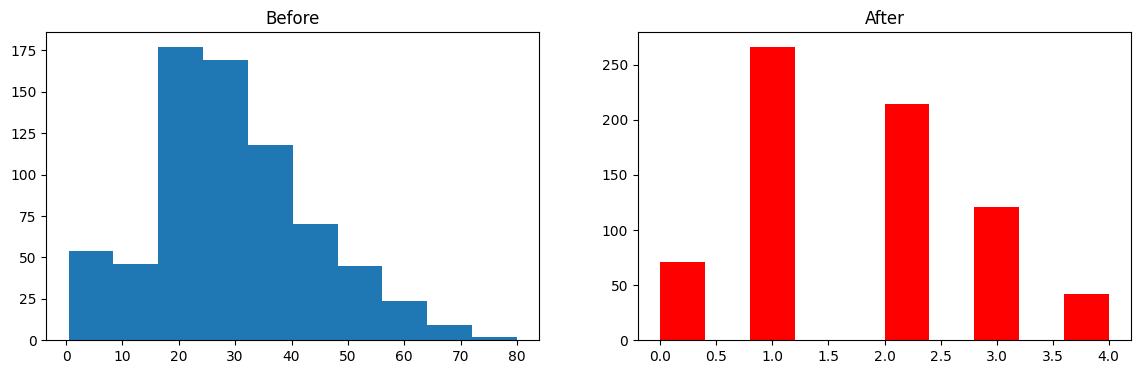

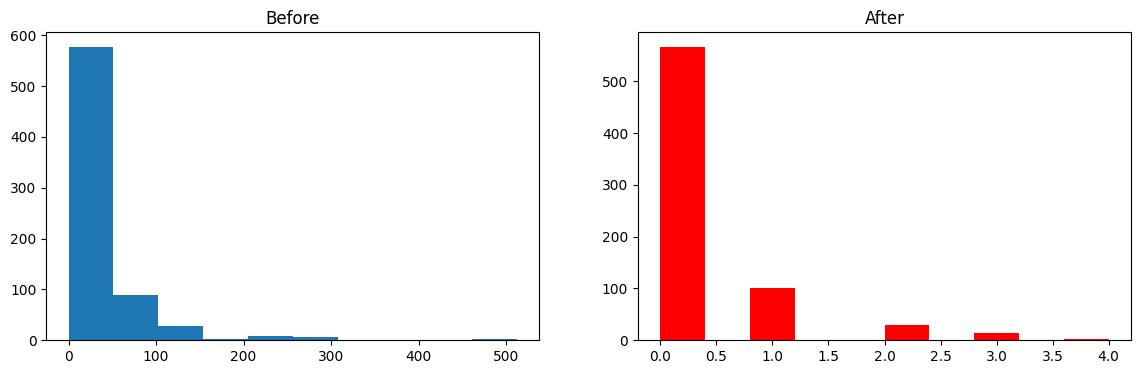

In [81]:
KDiscreate(5,'kmeans')

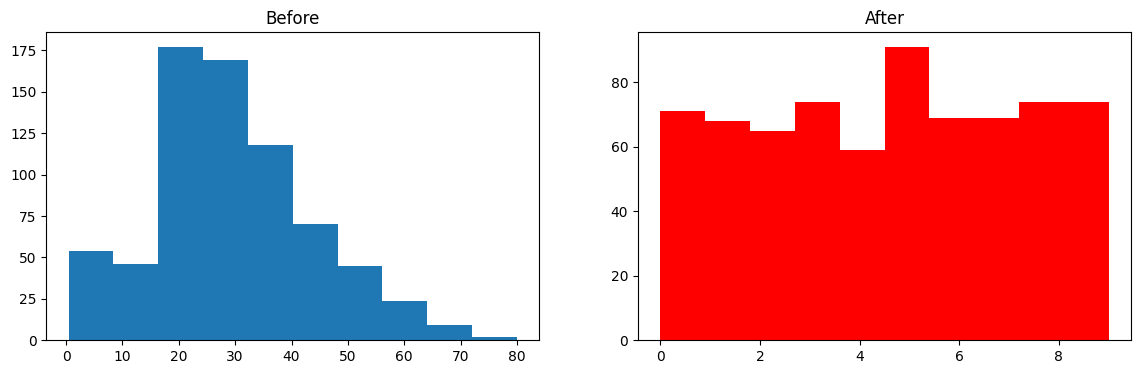

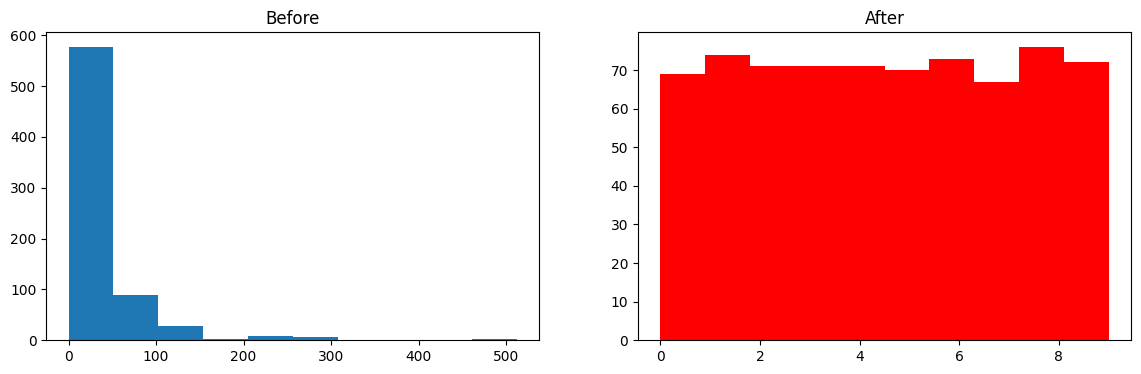

In [82]:
KDiscreate(10,'quantile')

# Binarization
1. Convert Data Into Binary values :: High/Low

In [86]:
df1 = pd.read_csv('train.csv',usecols=['SibSp','Parch'])
df1['family'] = df1['Parch'] + df1['SibSp']
df1.dropna(inplace=True)
df1.drop(columns=['SibSp','Parch'],inplace=True)
df1.value_counts()

family
0         537
1         161
2         102
3          29
5          22
4          15
6          12
10          7
7           6
Name: count, dtype: int64

In [85]:
from sklearn.preprocessing import Binarizer
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')
df2 = pd.DataFrame(trf.fit_transform(df1),columns=df1.columns)
df2.value_counts()

family
0         537
1         354
Name: count, dtype: int64